# Stacked Bar Charts

When you hear the word 'stacked', what is the first thing that comes to mind? To place something on top of the other right.
Stacked bar charts can be used in siuations where you want to compare the quantities of various companents side by side. In a way they are similar to multiple bar charts, but in this case instead of having the bars by each other, they are stacked upon each other.

Let us take a look at the documentation using the help function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
country = ['Nigeria', 'USA', 'Saudi', 'Russia', 'China', 'Canada']
O_P = [10000, 60000, 50000, 40000, 20000, 30000]#O_P stands for oil production(this are not the correct values)
O_C = [8000, 80000, 40000, 35000, 80000, 25000]#O_C stnads for oil consumption
df2 = pd.DataFrame({'Country': country, 'Production': O_P, 'Consumption': O_C})

df2

,Country,Production,Consumption
0,Nigeria,10000,8000
1,USA,60000,80000
2,Saudi,50000,40000
3,Russia,40000,35000
4,China,20000,80000
5,Canada,30000,25000


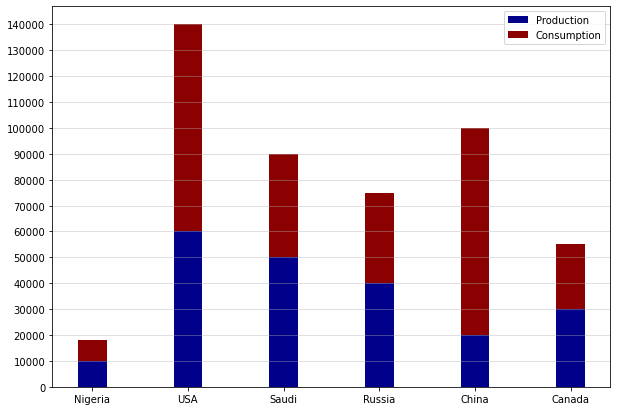

In [8]:
#create a simple stacked bar chart
x = np.arange(0, len(df2))
w = 0.3
plt.figure(figsize = (10, 7))
plt.grid('major', axis = 'y', alpha = 0.5)
plt.bar(x, df2['Production'], width = w, color = 'darkblue', label = 'Production')
plt.bar(x, df2['Consumption'], width = w, bottom = df2['Production'], color = 'darkred', label = 'Consumption')
plt.xticks(x, df2['Country'])
plt.yticks(np.arange(0, 150000, 10000))
plt.legend()


In [9]:
#Let us add another stack
ems = [4000, 20000, 10000, 15000, 20000, 18000]
df2['Emissions'] = ems
df2

,Country,Production,Consumption,Emissions
0,Nigeria,10000,8000,4000
1,USA,60000,80000,20000
2,Saudi,50000,40000,10000
3,Russia,40000,35000,15000
4,China,20000,80000,20000
5,Canada,30000,25000,18000


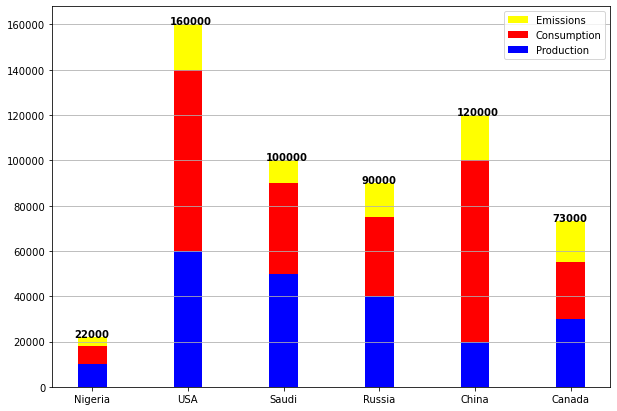

In [19]:
#Creating a 3 stacked bar chart
plt.figure(figsize = (10, 7))
plt.bar(x, df2['Emissions'], width = w, bottom = df2['Production']+df2['Consumption'], color = 'yellow', label = 'Emissions')
plt.bar(x, df2['Consumption'], width = w, bottom = df2['Production'], color = 'red', label = 'Consumption')
plt.bar(x, df2['Production'], width = w, color = 'blue', label = 'Production')
plt.xticks(x, df2['Country'])
#plt.yticks(np.arange(0, 150000, 10000))
plt.legend()
plt.grid('major', axis = 'y')
for i, v in list(zip(x, df2[['Consumption', 'Emissions', 'Production']].sum(axis = 1))):
  plt.text(i-0.19, v+100, str(v), fontweight = 'bold')

Now that you have seen how to create a stacked bar chart and even annotate it with text, the next thing to do will be to add

By now you should have known the different parameters you have to change to create a horizontal bar chart from a normal one
Have you noticed how plt.bar takes in weight and bottom while plt.barh takes in height and left
These are the diffrent parameters available to you that allows you create stacked bar plots for both distinctively


Also, notice that for horizontal bar charts the yticks and xticks parameters swap positions
These are the little things you sholud take note of


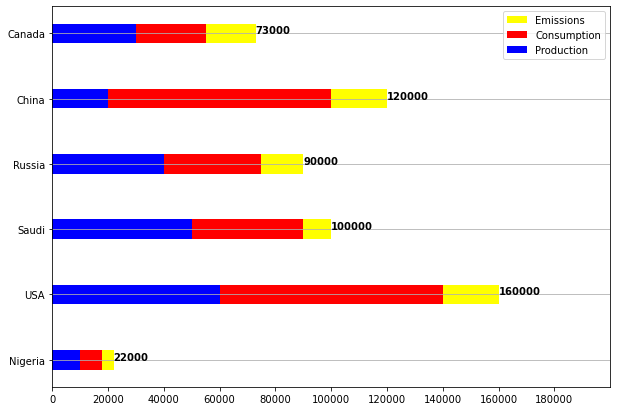

In [41]:
#Creating a 3 stacked bar chart
plt.figure(figsize = (10, 7))
plt.xlim(0, 200000)
plt.barh(x, df2['Emissions'], height = w, left = df2['Production']+df2['Consumption'], color = 'yellow', label = 'Emissions')
plt.barh(x, df2['Consumption'], height = w, left = df2['Production'], color = 'red', label = 'Consumption')
plt.barh(x, df2['Production'], height = w, color = 'blue', label = 'Production')
plt.yticks(x, df2['Country'])
plt.xticks(np.arange(0, 200000, 20000))
plt.legend()
plt.grid('major', axis = 'y')
for i, v in list(zip(x, df2[['Consumption', 'Emissions', 'Production']].sum(axis = 1))):
   plt.text(v, i, str(v), fontweight = 'bold')

print('By now you should have known the different parameters you have to change to create a horizontal bar chart from a normal one\nHave you noticed how plt.bar takes in weight and bottom while plt.barh takes in height and left\nThese are the diffrent parameters available to you that allows you create stacked bar plots for both distinctively')
print('\n')
print('Also, notice that for horizontal bar charts the yticks and xticks parameters swap positions\nThese are the little things you sholud take note of')

Now that you know the how to create stacked bar charts, the qusestion now remains, do you know when to use them, you should know that the example I used above is not the best way to use stacked bar plots.
For the x-axis, it is okay to use the country labels or any other categorical variables
For the y-axis, it should be a continious varaible that are categorical in the sense that they sum up to give a cummulative
Take for example, the perfect case will be to make a plot of the ''Sources of Energy Consumption of each country'':
Each country consumes energy, but from different sources, these sources are all added together in the same units to give the total energy consumption. So you can use a stacked bar chart to illustrate this.

Congratulations!!!
We are done with the basics of all bar charts, what will be left in advanced lectures will be to find out advanced formatting techniques.

We are down to one more type of chart in the beginner stages of creating plots and that is......

# Stackplot

In [43]:
##Take a look at the documentation
help(plt.stackplot)

Help on function stackplot in module matplotlib.pyplot:

stackplot(x, *args, labels=(), colors=None, baseline='zero', data=None, **kwargs)
    Draw a stacked area plot.
    
    Parameters
    ----------
    x : 1d array of dimension N
    
    y : 2d array (dimension MxN), or sequence of 1d arrays (each dimension 1xN)
    
        The data is assumed to be unstacked. Each of the following
        calls is legal::
    
            stackplot(x, y)               # where y is MxN
            stackplot(x, y1, y2, y3, y4)  # where y1, y2, y3, y4, are all 1xNm
    
    baseline : {'zero', 'sym', 'wiggle', 'weighted_wiggle'}
        Method used to calculate the baseline:
    
        - ``'zero'``: Constant zero baseline, i.e. a simple stacked plot.
        - ``'sym'``:  Symmetric around zero and is sometimes called
          'ThemeRiver'.
        - ``'wiggle'``: Minimizes the sum of the squared slopes.
        - ``'weighted_wiggle'``: Does the same but weights to account for
          size of

I will make the explanation simple, stacked plots are similar to line plots and just like stacked bar charts, the stacked in this sense refers to placing things on top of one another.
So when do you use stacked plots.
Refer back to the explanation above where I explained the best way to use a stacked bar plots,
Let us say we take Nigeria from the list of countries stated; we can examine the growth of the energy consummption over the past 50 years.
So we can't use stacked plots in the comparision of various energy consumptions of all countries but by selecting just one cou ntry and showing variations across the years.

Let us dive into examples so that you can understand better.

In [2]:
#Create our data sets
#we cab are going to be lookig at the changes in the US primary sources of energy consumption over the past ten years
#The units of measuremnts are in MTOE(mILLION TONNES OF OIL EQUIVALENT)
#MTOE refers to the amount of energy you can get from any energy when you convert it to an equivalent amount of oil
year = ['2000', '2004', '2008', '2012', '2016', '2020']
oil = [5000, 8000, 10000, 15000,18000, 17000]#oil consumption in mtoe
ren = [200, 400, 800, 2000, 5000, 8000]
gas = [2500, 4000, 5000, 7000, 12000, 14000]
coal = [4000, 7000, 8000, 10000, 15000, 14000]
hydro = [1000, 2000, 4000, 6000, 8000, 10000]
nuclear = [3000, 5000, 7000, 9000, 10000, 11000]

df3 = pd.DataFrame({'year': year, 'oil':oil, 'gas': gas, 'coal': coal, 'ren':ren, 'hydro':hydro, 'nuclear':nuclear})

In [3]:
df3

,year,oil,gas,coal,ren,hydro,nuclear
0,2000,5000,2500,4000,200,1000,3000
1,2004,8000,4000,7000,400,2000,5000
2,2008,10000,5000,8000,800,4000,7000
3,2012,15000,7000,10000,2000,6000,9000
4,2016,18000,12000,15000,5000,8000,10000
5,2020,17000,14000,14000,8000,10000,11000


The charts below tells us two things
1) Energy consumption has been increasing
2) The variations at which the each energy source consumption has been increasing 


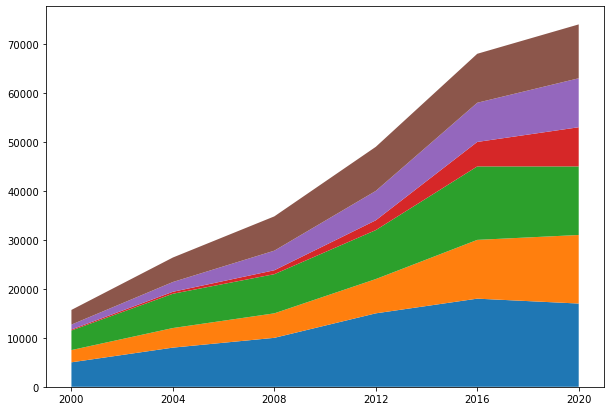

In [6]:
#Ordinary stack plot
plt.figure(figsize = (10, 7))
plt.stackplot(df3['year'], df3['oil'], df3['gas'], df3['coal'], df3['ren'], df3['hydro'], df3['nuclear'])
print('The charts below tells us two things\n1) Energy consumption has been increasing\n2) The variations at which the each energy source consumption has been increasing ')

The chart is an example of a simple stacked plot.
Let us now add more features and makeit look more customized, you can refer to help(plt.stackplot) for more info

In [7]:
help(plt.stackplot)

Help on function stackplot in module matplotlib.pyplot:

stackplot(x, *args, labels=(), colors=None, baseline='zero', data=None, **kwargs)
    Draw a stacked area plot.
    
    Parameters
    ----------
    x : 1d array of dimension N
    
    y : 2d array (dimension MxN), or sequence of 1d arrays (each dimension 1xN)
    
        The data is assumed to be unstacked. Each of the following
        calls is legal::
    
            stackplot(x, y)               # where y is MxN
            stackplot(x, y1, y2, y3, y4)  # where y1, y2, y3, y4, are all 1xNm
    
    baseline : {'zero', 'sym', 'wiggle', 'weighted_wiggle'}
        Method used to calculate the baseline:
    
        - ``'zero'``: Constant zero baseline, i.e. a simple stacked plot.
        - ``'sym'``:  Symmetric around zero and is sometimes called
          'ThemeRiver'.
        - ``'wiggle'``: Minimizes the sum of the squared slopes.
        - ``'weighted_wiggle'``: Does the same but weights to account for
          size of

Text(0.5, 1.0, 'USA Primary Energy Consumption(2000 -2020)')

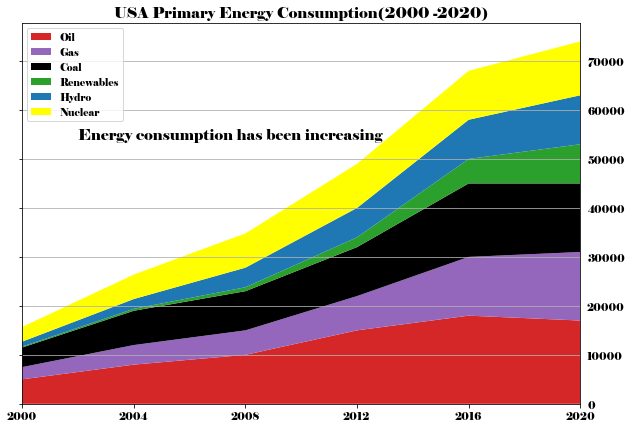

In [30]:
x = np.arange(0, len(df3))
color = ['tab:red', 'tab:purple', 'black', 'tab:green', 'tab:blue', 'yellow']
label = ['Oil', 'Gas', 'Coal', 'Renewables', 'Hydro', 'Nuclear']
plt.rc('font', family = 'elephant')
fig, ax = plt.subplots(figsize = (10,7))
plt.xlim(0, len(df3)-1)
ax.stackplot(x,df3['oil'], df3['gas'], df3['coal'], df3['ren'], df3['hydro'], df3['nuclear'] ,labels = label, colors = color)
plt.xticks(x, df3['year'], fontsize = 10, fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.grid('Major', axis = 'y')
plt.tick_params(labelright = True, labelleft = False)#Take note of this, you can use it to manipulate the position of the ticks
plt.text(0.5, 54000, 'Energy consumption has been increasing', fontsize = 15)
plt.title('USA Primary Energy Consumption(2000 -2020)', fontsize = 15, fontweight = 'bold')
#df3[['oil', 'gas', 'coal', 'ren', 'hydro', 'nuclear']]

The major takeaway from all these lessons is learning how to manipulate charts and plots till you get whatever you want, that is one of the prime reasons I love plotting with python because of the ability I have over the charts.

Now that you have completed the introduction course, I hope you understand the basics in charts creation, we will be learning about more advanced techniques in the following modules, but first, you have to get to through your first test.